In [78]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [79]:
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data")
df

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [80]:
df.columns = [  'name'
              , 'alcohol'
             ,'malicAcid'
             ,'ash'
            ,'ashalcalinity'
             ,'magnesium'
            ,'totalPhenols'
             ,'flavanoids'
             ,'nonFlavanoidPhenols'
             ,'proanthocyanins'
            ,'colorIntensity'
             ,'hue'
             ,'OD280/OD315 of diluted wines'
             ,'proline'
                ]

In [81]:
df.head(2)

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,OD280/OD315 of diluted wines,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [82]:
df.isnull().sum()

name                            0
alcohol                         0
malicAcid                       0
ash                             0
ashalcalinity                   0
magnesium                       0
totalPhenols                    0
flavanoids                      0
nonFlavanoidPhenols             0
proanthocyanins                 0
colorIntensity                  0
hue                             0
OD280/OD315 of diluted wines    0
proline                         0
dtype: int64

In [83]:
df.dtypes

name                              int64
alcohol                         float64
malicAcid                       float64
ash                             float64
ashalcalinity                   float64
magnesium                         int64
totalPhenols                    float64
flavanoids                      float64
nonFlavanoidPhenols             float64
proanthocyanins                 float64
colorIntensity                  float64
hue                             float64
OD280/OD315 of diluted wines    float64
proline                           int64
dtype: object

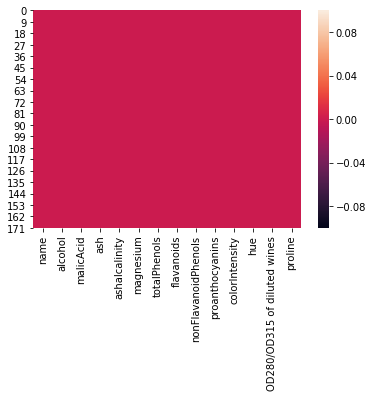

In [84]:
sns.heatmap(df.isnull())

In [85]:
dfcor=df.corr()

In [86]:
dfcor

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,OD280/OD315 of diluted wines,proline
name,1.000000,-0.321238,0.436127,-0.048260,0.513963,-0.198944,-0.717933,-0.846485,0.487215,-0.494887,0.268562,-0.617690,-0.786428,-0.631227
alcohol,-0.321238,1.000000,0.099963,0.210964,-0.303350,0.258742,0.284543,0.230133,-0.151445,0.127561,0.547883,-0.075375,0.057417,0.641068
malicAcid,0.436127,0.099963,1.000000,0.164955,0.286148,-0.049049,-0.333512,-0.409324,0.291501,-0.217975,0.250053,-0.560854,-0.366720,-0.189512
ash,-0.048260,0.210964,0.164955,1.000000,0.446698,0.287107,0.128176,0.114084,0.187354,0.008082,0.258643,-0.075181,0.001503,0.222979
ashalcalinity,0.513963,-0.303350,0.286148,0.446698,1.000000,-0.071707,-0.317583,-0.346922,0.359395,-0.190779,0.020478,-0.272719,-0.268186,-0.436858
magnesium,-0.198944,0.258742,-0.049049,0.287107,-0.071707,1.000000,0.208200,0.187101,-0.252091,0.226504,0.199337,0.052042,0.046961,0.387542
totalPhenols,-0.717933,0.284543,-0.333512,0.128176,-0.317583,0.208200,1.000000,0.864046,-0.448301,0.610533,-0.056401,0.432987,0.699566,0.495839
flavanoids,-0.846485,0.230133,-0.409324,0.114084,-0.346922,0.187101,0.864046,1.000000,-0.536326,0.650254,-0.174411,0.543208,0.786372,0.491180
nonFlavanoidPhenols,0.487215,-0.151445,0.291501,0.187354,0.359395,-0.252091,-0.448301,-0.536326,1.000000,-0.363268,0.140192,-0.261709,-0.501859,-0.308886
proanthocyanins,-0.494887,0.127561,-0.217975,0.008082,-0.190779,0.226504,0.610533,0.650254,-0.363268,1.000000,-0.027112,0.294397,0.513415,0.325731


In [87]:
df.proline.value_counts()

680     5
520     5
630     4
625     4
750     4
       ..
1020    1
392     1
465     1
352     1
502     1
Name: proline, Length: 121, dtype: int64

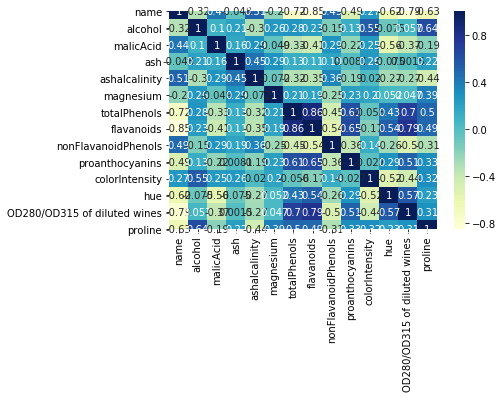

In [88]:
corr=df[df.columns].corr()
sns.heatmap(corr,cmap="YlGnBu",annot=True)

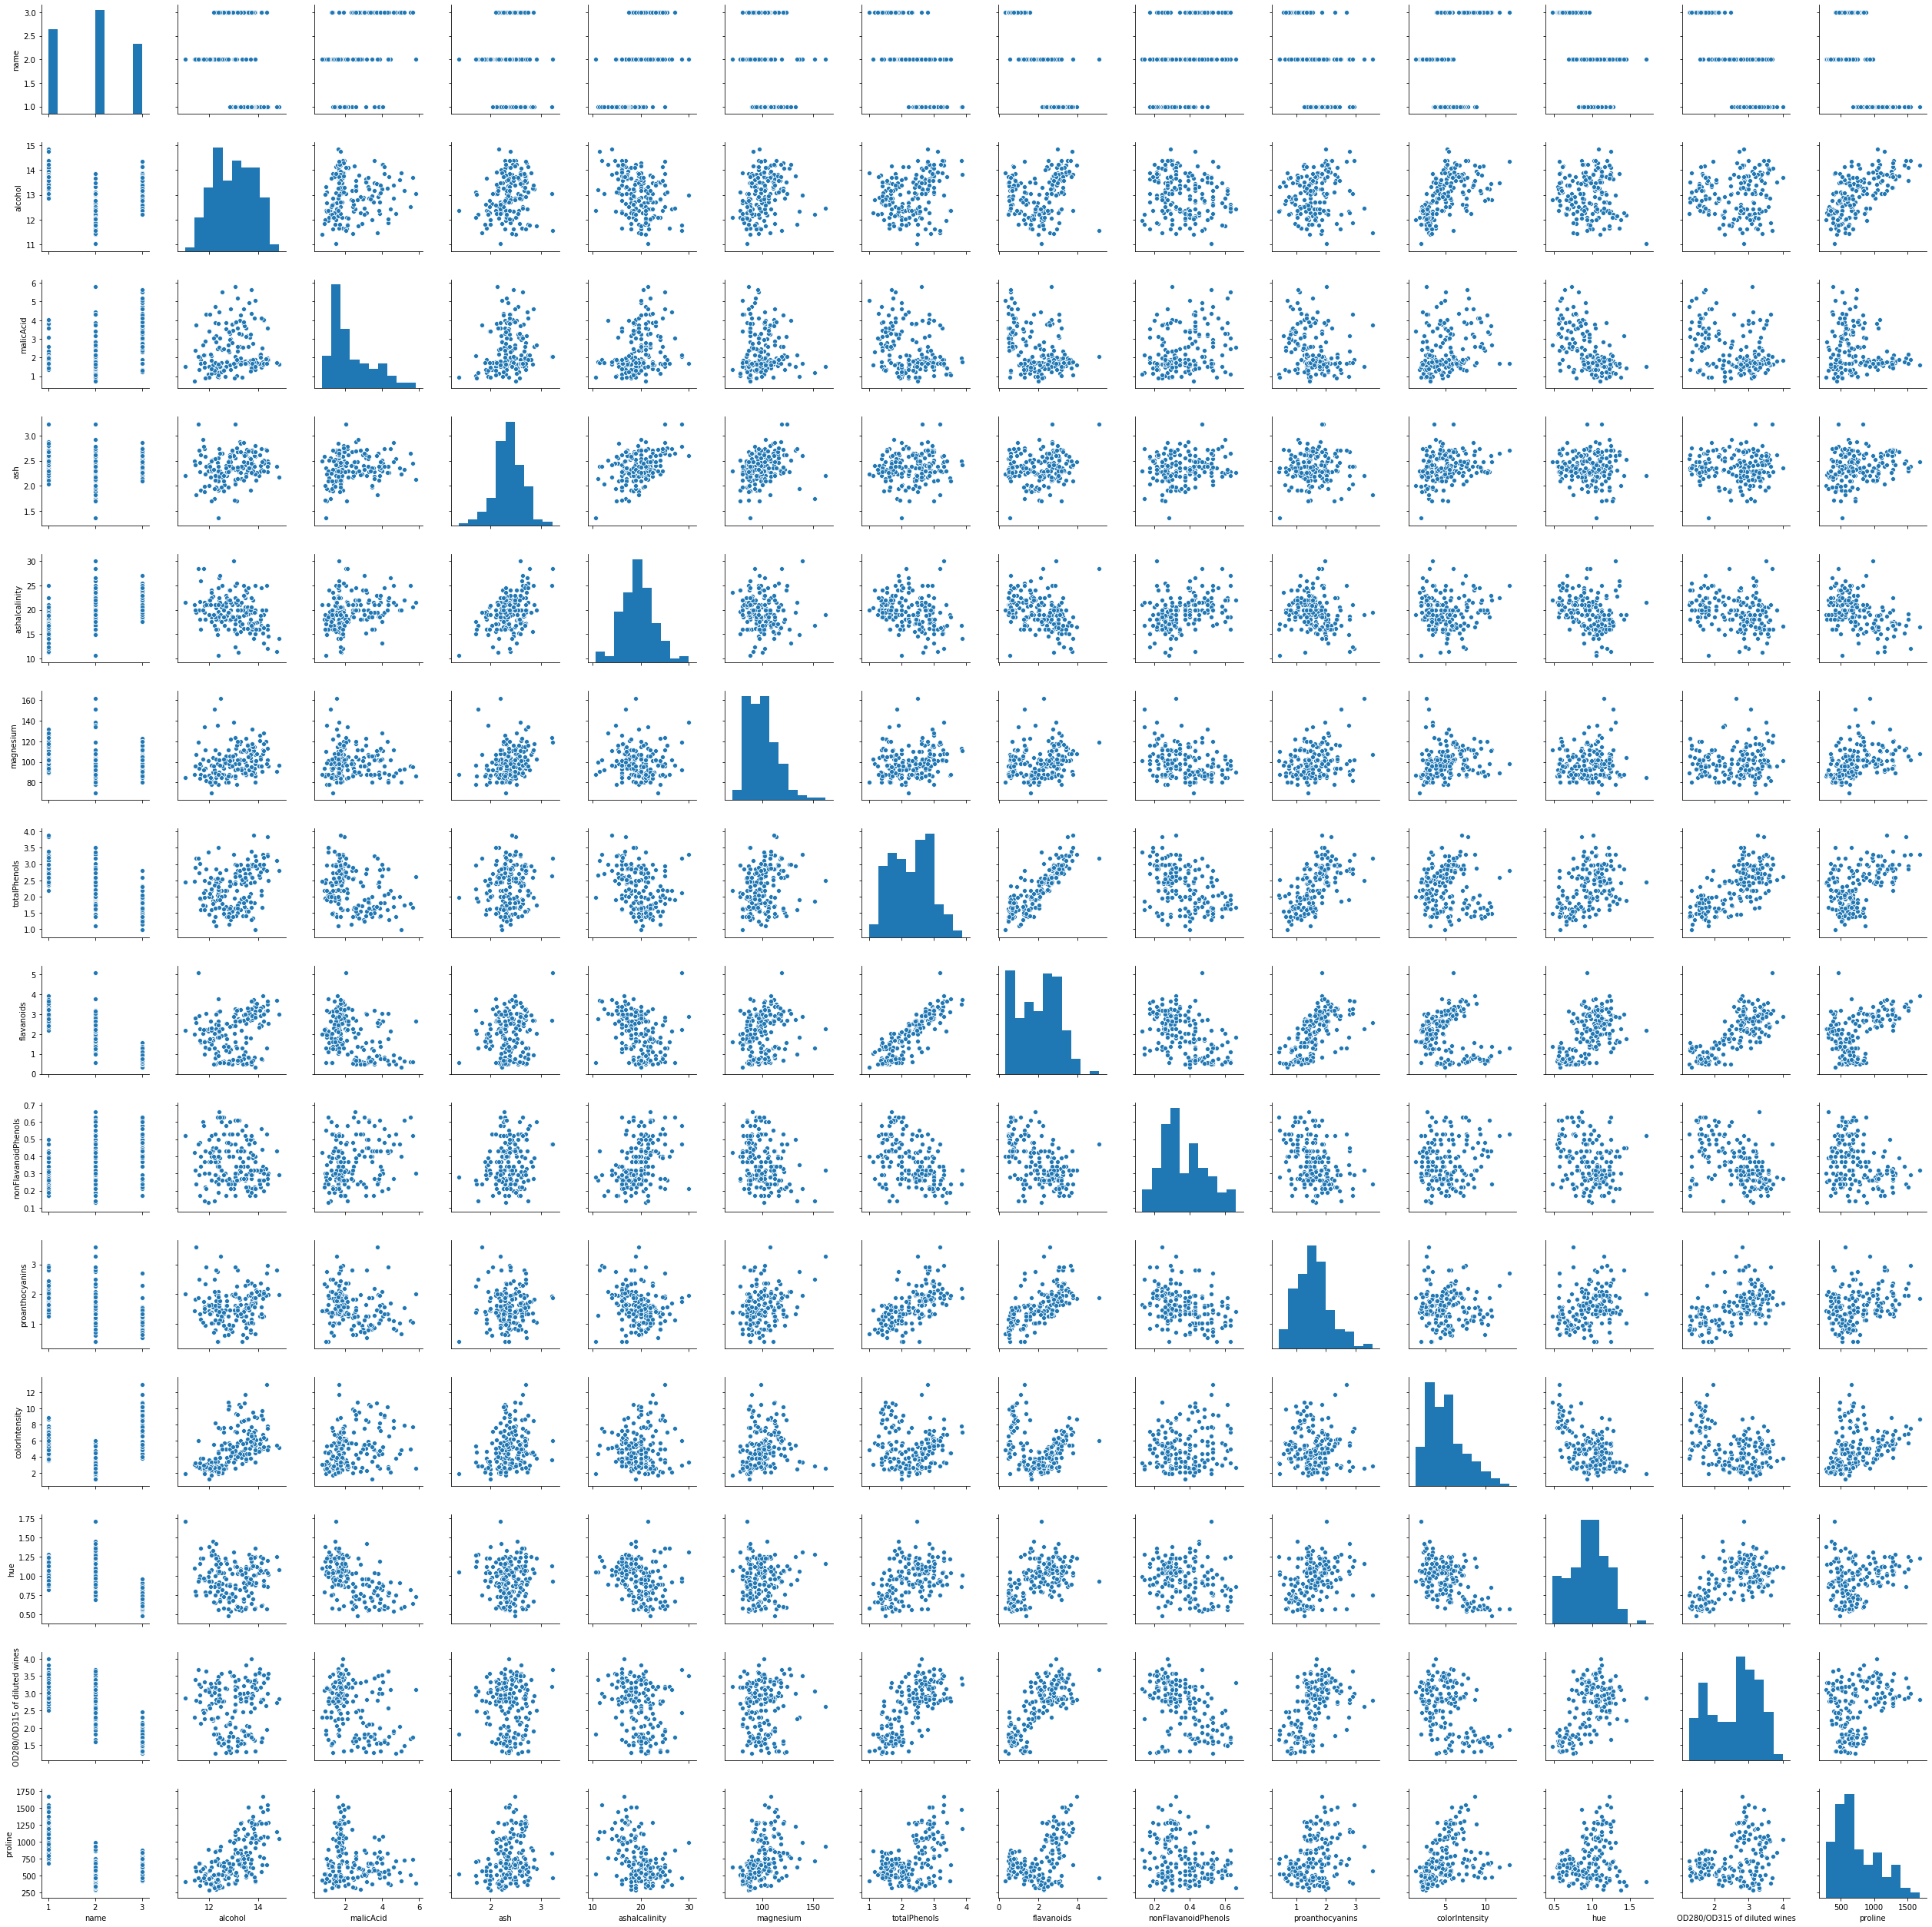

In [89]:
sns.pairplot(df)

In [90]:
df.dtypes

name                              int64
alcohol                         float64
malicAcid                       float64
ash                             float64
ashalcalinity                   float64
magnesium                         int64
totalPhenols                    float64
flavanoids                      float64
nonFlavanoidPhenols             float64
proanthocyanins                 float64
colorIntensity                  float64
hue                             float64
OD280/OD315 of diluted wines    float64
proline                           int64
dtype: object

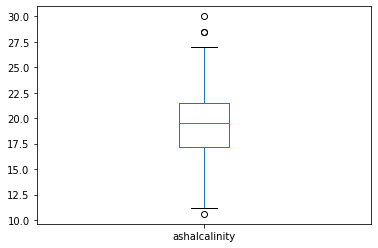

In [91]:
df['ashalcalinity'].plot.box()

In [92]:
df.describe()

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,OD280/OD315 of diluted wines,proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [93]:
x= df.drop(['name','ash'], axis=1)

x.head()

,alcohol,malicAcid,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,OD280/OD315 of diluted wines,proline
0,13.20,1.78,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [94]:
y=df.iloc[:,:1]
y.head()

,name
0,1
1,1
2,1
3,1
4,1


In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print(x_train.shape)
print(x_test.shape)

(123, 12)
(54, 12)


In [96]:
lg=LogisticRegression()

In [97]:
lg.fit(x_train,y_train)
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=gnb.predict(x_test)
print(accuracy_score(predmnb,y_test))


0.9629629629629629


In [98]:
from sklearn.metrics import confusion_matrix

mnb=MultinomialNB()

score=cross_val_score(mnb,x,y,cv=5)
print('Score:',score)

print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(mnb,x,y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

Score: [0.72972973 0.83333333 0.80555556 0.91176471 1.        ]
Mean Scores 0.8560766649001943
Standard deviation 0.0925724299581946
Y Prediction values
[1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 3 2 2 3 2 2 3 2 1 2 2 3 1
 2 2 2 2 2 2 1 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 2 3 3 3 1 2 3 3 3 3 3 3
 3 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


array([[51,  6,  1],
       [ 3, 60,  8],
       [ 1,  7, 40]], dtype=int64)

In [99]:
print(confusion_matrix(y_test,predmnb))

[[18  1  0]
 [ 0 20  1]
 [ 0  0 14]]


In [100]:
print(classification_report(y_test,predmnb))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.95      0.95      0.95        21
           3       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.96      0.96      0.96        54



In [101]:
pred=lg.predict(x_test)
print(pred)

[1 3 2 1 2 2 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 3 2 2 2 2 3 1 1 2 1 1 1 3
 2 2 3 2 1 2 2 2 1 3 2 3 1 3 3 1 3]


In [102]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [103]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [104]:
predsvc=svc.predict(x_test)
print('actual and predicted value score',accuracy_score(y_test,predsvc))

actual and predicted value score 0.4074074074074074


In [105]:
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

[[ 0 19  0]
 [ 0 21  0]
 [ 0 13  1]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        19
           2       0.40      1.00      0.57        21
           3       1.00      0.07      0.13        14

    accuracy                           0.41        54
   macro avg       0.47      0.36      0.23        54
weighted avg       0.41      0.41      0.26        54



In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)

In [108]:
predknn

array([1, 2, 2, 1, 2, 2, 1, 3, 2, 2, 2, 2, 1, 2, 1, 3, 1, 3, 3, 1, 2, 1,
       1, 2, 2, 3, 2, 2, 2, 3, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 3, 1, 2, 2,
       2, 1, 2, 2, 1, 1, 3, 2, 1, 3], dtype=int64)

In [109]:
print(confusion_matrix(y_test,predknn))

[[17  0  2]
 [ 1 17  3]
 [ 3  6  5]]


In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
dct=DecisionTreeClassifier()
dct.fit(x_train,y_train)
predknn=knn.predict(x_test)

In [112]:
predknn

array([1, 2, 2, 1, 2, 2, 1, 3, 2, 2, 2, 2, 1, 2, 1, 3, 1, 3, 3, 1, 2, 1,
       1, 2, 2, 3, 2, 2, 2, 3, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 3, 1, 2, 2,
       2, 1, 2, 2, 1, 1, 3, 2, 1, 3], dtype=int64)

In [113]:
print(confusion_matrix(y_test,predknn))

[[17  0  2]
 [ 1 17  3]
 [ 3  6  5]]


In [114]:
print(classification_report(y_test,predknn))

              precision    recall  f1-score   support

           1       0.81      0.89      0.85        19
           2       0.74      0.81      0.77        21
           3       0.50      0.36      0.42        14

    accuracy                           0.72        54
   macro avg       0.68      0.69      0.68        54
weighted avg       0.70      0.72      0.71        54



In [115]:
sv=SVC()
score=cross_val_score(sv,x,y,cv=5,scoring='accuracy')
print('accuracy score=',score)
print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(sv,x,y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

accuracy score= [0.40540541 0.41666667 0.38888889 0.41176471 0.44117647]
Mean Scores 0.4127804274863099
Standard deviation 0.01701567733847804
Y Prediction values
[2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


array([[ 2, 56,  0],
       [ 0, 71,  0],
       [ 0, 48,  0]], dtype=int64)

In [116]:
dtc=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dtc,x,y,cv=5,scoring='f1_macro')
print('F1-score=',score)
print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(dtc,x,y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

F1-score= [0.76602564 0.88469036 0.92203898 0.9427736  0.82834758]
Mean Scores 0.8687752317851742
Standard deviation 0.06443283377850346
Y Prediction values
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 2 2 2 2 3 2 2 2 2 1 2
 2 2 2 2 2 2 1 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2
 2 2 2 2 2 2 2 2 2 3 1 1 1 2 2 2 2 1 3 3 3 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


array([[57,  1,  0],
       [ 7, 60,  4],
       [ 0,  5, 43]], dtype=int64)

In [117]:
svrbf=SVC(kernel='rbf')
score=cross_val_score(svrbf,x,y,cv=5)

print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(svrbf,x,y,cv=5)


conf_mat=confusion_matrix(y,y_pred)
print(conf_mat)

Mean Scores 0.4127804274863099
Standard deviation 0.01701567733847804
[[ 2 56  0]
 [ 0 71  0]
 [ 0 48  0]]


In [118]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.3992782368666683

In [119]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
rfr=RandomForestRegressor(n_estimators=200,random_state=45)
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=45, verbose=0,
                      warm_start=False)

In [121]:
rfr.score(x_train,y_train)

0.9914003713424169

In [122]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9814814814814815

In [123]:
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier(n_estimators=50,base_estimator=dtc)
adc.fit(x_train,y_train)
adc.score(x_train,y_train)

1.0

In [124]:
from sklearn.externals import joblib
joblib.dump(adc,'adcwine.obj')
adc_from_joblib=joblib.load('adcwine.obj')